In [ ]:
# calculation posterior and type errors

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

In [ ]:
#x data
x = np.arange(-10000, 10000, 0.001)

In [ ]:
#probability distribution of normal distubutions

f0 = stats.norm.pdf(x, -100, 2000)
f1 = stats.norm.pdf(x, 100, 2000)

<function matplotlib.pyplot.show(close=None, block=None)>

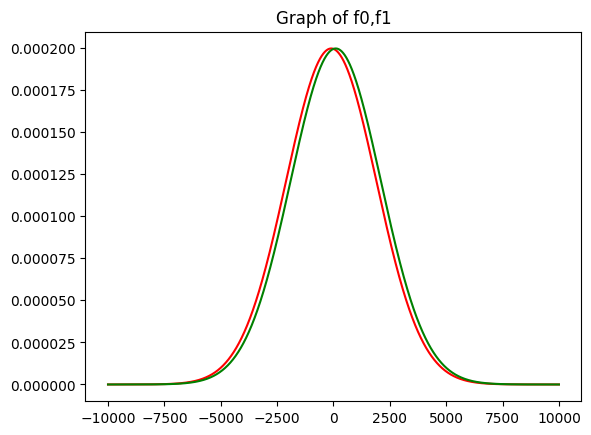

In [ ]:
plt.plot(x, f0 ,color = 'red')
plt.plot(x,f1, color = 'green')
plt.title("Graph of f0,f1")
plt.show

In [ ]:
#Values of P(X=0), P(X=1)
p0 = 0.5
p1 = 0.5

In [ ]:
def posterior(x):
  global p0
  global p1
  i = x + 10000
  f0_x = f0[i]
  f1_x = f1[i]
  sum = p0*(f0_x) + p1*(f1_x)
  q0_x = p0*(f0_x) / sum
  q1_x = p1*(f1_x) / sum
  if (q0_x >= q1_x) :
    value = 0
    # print("q0x>=q1x")
  else :
    value = 1
    # print("q0x<q1x")
  return q0_x, q1_x, value

In [ ]:
q0_x, q1_x, value = posterior(300)
print(q0_x)
print(q1_x)
print(value)

0.6223382966594891
0.37766170334051086
0


In [ ]:
#by formula
def gaussianvalue(x, mean, deviation,p):
  # p used only for integration purpose in gaussian there is no actual p
    return p*(1 / (deviation * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / deviation)**2)

In [ ]:
#given
mean1 = -1
mean2 = 1

In [ ]:
L1 = -np.inf
H1 = (mean1 + mean2)/2
L2 = H1
H2 = np.inf
deviation = 1

In [ ]:
#Type1 error is 'false positive'

Type1_error, _ = quad(gaussianvalue, L1, H1, args=(mean2, deviation,p0))
print(Type1_error)

0.07932762696572854


In [ ]:
#Type2 error is 'false negative'

Type2_error, _ = quad(gaussianvalue, L2, H2, args=(mean1, deviation,p1))
print(Type2_error)

0.07932762696572854


In [ ]:
error = Type1_error + Type2_error
print(error)

0.15865525393145707
